In [ ]:
#import needed packages
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [ ]:
# Define the path to the directory containing the images
data_dir='/input/images'
train_dir = '/input/images_train_test_val/train'
test_dir = '/input/images_train_test_val/test'
val_dir = '/input/images_train_test_val/validation'

In [ ]:
# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

In [ ]:
# Define the number of classes
num_classes = len(os.listdir(data_dir))

In [ ]:
# Set up the data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)
test_generator= datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 8400 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [ ]:
# Load the pre-trained ResNet152V2 model
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
# Add a custom output layer for our classification task
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Build the model
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

Epoch 1/10
263/263 [==============================] - 204s 722ms/step - loss: 2.2671 - accuracy: 0.4169 - val_loss: 0.8700 - val_accuracy: 0.7248
Epoch 2/10
263/263 [==============================] - 145s 553ms/step - loss: 0.8433 - accuracy: 0.7412 - val_loss: 0.4952 - val_accuracy: 0.8586
Epoch 3/10
263/263 [==============================] - 146s 554ms/step - loss: 0.5797 - accuracy: 0.8173 - val_loss: 0.3984 - val_accuracy: 0.8862
Epoch 4/10
263/263 [==============================] - 148s 564ms/step - loss: 0.4785 - accuracy: 0.8495 - val_loss: 0.3109 - val_accuracy: 0.9119
Epoch 5/10
263/263 [==============================] - 145s 551ms/step - loss: 0.3973 - accuracy: 0.8726 - val_loss: 0.3278 - val_accuracy: 0.8990
Epoch 6/10
263/263 [==============================] - 145s 551ms/step - loss: 0.3977 - accuracy: 0.8677 - val_loss: 0.3286 - val_accuracy: 0.9010
Epoch 7/10
263/263 [==============================] - 146s 556ms/step - loss: 0.3595 - accuracy: 0.8804 - val_loss: 0.2472 -

In [ ]:
# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Found 2100 images belonging to 21 classes.
66/66 [==============================] - 29s 436ms/step - loss: 0.2456 - accuracy: 0.9233
Test loss: 0.245628222823143
Test accuracy: 0.9233333468437195


In [ ]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_data= test_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=False)

Found 1050 images belonging to 21 classes.


In [ ]:
model.evaluate(test_generator)
preds = model.predict(test_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_generator.labels)

66/66 [==============================] - 31s 438ms/step


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report 
import seaborn as sns

In [ ]:
class_label=list(train_generator.class_indices.keys())

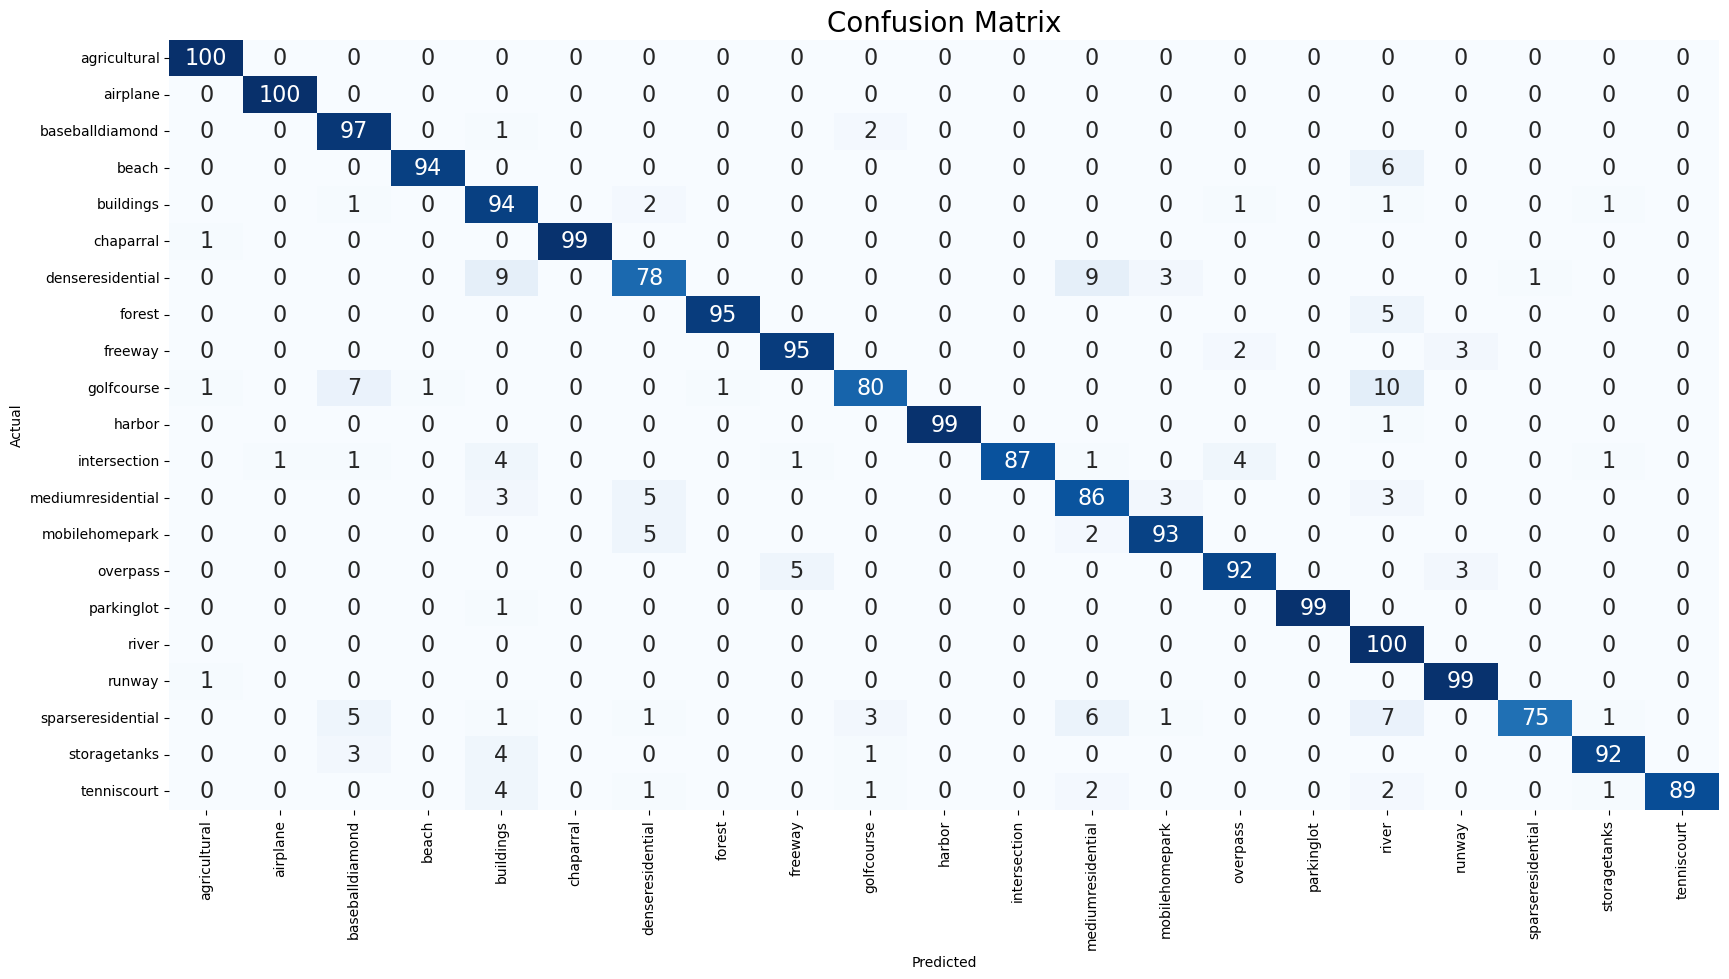

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=class_label, index = class_label)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       0.99      1.00      1.00       100
           2       0.85      0.97      0.91       100
           3       0.99      0.94      0.96       100
           4       0.78      0.94      0.85       100
           5       1.00      0.99      0.99       100
           6       0.85      0.78      0.81       100
           7       0.99      0.95      0.97       100
           8       0.94      0.95      0.95       100
           9       0.92      0.80      0.86       100
          10       1.00      0.99      0.99       100
          11       1.00      0.87      0.93       100
          12       0.81      0.86      0.83       100
          13       0.93      0.93      0.93       100
          14       0.93      0.92      0.92       100
          15       1.00      0.99      0.99       100
          16       0.74      1.00      0.85       100
          17       0.94    

In [ ]:
tf.keras.models.save_model(model,'resnet_model.hdf5')